<h1><b>FINAL PROJECT UJIAN AKHIR SEMESTER GENAP</b></h1>

<h2><b>Big Data And Predictive Analytics</b></h2>

<h5>Anggota Kelompok :</h5>
<ol>
    <li><p>Nama : Muhammad Reza Setiawan : 21.11.3934</p></li> 
    <p>Nim : 21.11.3934</p>
    <li><p>Nama : Danang Budi Prasetyo : 21.11.3960</p></li>
    <p>Nim : 21.11.3960</p>
    <li><p>Nama : Dahniar</p></li>
    <p>Nim : 21.11.3925 </p>
    <li><p>Nama : Alexandra Gloria Doke</p></li>
    <p>Nim : 21.11.3956 </p>

</ol>

<h2><b>IMPORT LIBRARY</b></h2>

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_error
from sklearn.model_selection import train_test_split

<h2><b>IMPORT DATASET</b></h2>

In [101]:
df = pd.read_csv('./weather_prediction_dataset.csv')
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


<h3><b>MEMPERSIAPKAN DATA</b></h3>
<p>1) Melihat Jumlah Baris Dan Column Dataset</p>

In [102]:
df.shape

(3654, 165)

<p>2) Melihat tipe data tiap kolom dari dataset</p>

In [103]:
df.dtypes

DATE                        int64
MONTH                       int64
BASEL_cloud_cover           int64
BASEL_humidity            float64
BASEL_pressure            float64
                           ...   
TOURS_global_radiation    float64
TOURS_precipitation       float64
TOURS_temp_mean           float64
TOURS_temp_min            float64
TOURS_temp_max            float64
Length: 165, dtype: object

<p>3) Melihat data kolom apakah ada yang terdapat data kosong (NA) dan menghitung serta membersihkan data NULL</p>


In [104]:
df.isna()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3650,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3652,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<p> 4. melihat jumlah data yang kosong</p>

In [105]:
df.isna().sum()

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64

<p>5.Mengurangi Fitur (Kolom) Yang Tidak Di Gunakan</p>

In [106]:
kolom_digunakan = df.columns[df.columns.str.contains("BASEL|DATE|MONTH") == True]
df = df[kolom_digunakan]

<h3><b>EDA (Exploratory Data Analytics)</b></h3>
<p><b>1.Print DataFrame</b></p>

In [107]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6
...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,4.8
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,10.0
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,11.5
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,7.9


<p><b>2.Melihat 10 Data Teratas</b></p>

In [108]:
df.head(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6
5,20000106,1,3,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,6.9
6,20000107,1,8,0.84,1.0267,0.20,0.00,0.0,4.7,1.8,6.2
7,20000108,1,4,0.79,1.0248,0.54,0.00,4.3,5.6,4.1,8.4
8,20000109,1,8,0.88,1.0243,0.11,0.65,0.0,4.6,3.8,5.7
9,20000110,1,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,3.8


<p><b>3.Melihat 10 Data Terakhir</b></p>

In [109]:
df.tail(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
3644,20091223,12,8,0.93,0.9984,0.36,0.61,1.1,2.9,0.6,4.4
3645,20091224,12,8,0.93,0.9924,0.13,0.89,0.0,3.9,2.3,5.7
3646,20091225,12,6,0.71,1.0025,0.16,0.06,0.2,6.2,1.2,10.6
3647,20091226,12,4,0.81,1.0120,0.54,0.00,5.9,0.4,-2.0,4.0
3648,20091227,12,7,0.80,1.0118,0.37,0.18,2.3,1.0,-3.9,5.5
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,4.8
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,10.0
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,11.5
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,7.9
3653,20100101,1,8,0.93,0.9965,0.08,0.56,0.0,2.9,-0.2,4.8


<p><b>3.Melihat Nama-nama Column Dari Dataset</b></p>

In [110]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       'BASEL_temp_max'],
      dtype='object')

<p><b>4.melihat informasi column dataset</b></p>

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    3654 non-null   int64  
 1   MONTH                   3654 non-null   int64  
 2   BASEL_cloud_cover       3654 non-null   int64  
 3   BASEL_humidity          3654 non-null   float64
 4   BASEL_pressure          3654 non-null   float64
 5   BASEL_global_radiation  3654 non-null   float64
 6   BASEL_precipitation     3654 non-null   float64
 7   BASEL_sunshine          3654 non-null   float64
 8   BASEL_temp_mean         3654 non-null   float64
 9   BASEL_temp_min          3654 non-null   float64
 10  BASEL_temp_max          3654 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 314.1 KB


<P><b>5.melihat descripsi dari dataset Sebelum Di Bersihkan Outliers</b></P>

In [112]:
df.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,15.536782
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,8.721323
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,-5.700000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,8.700000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,15.800000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,22.300000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,38.600000


<p><b>6.Membuat Fungsi Untuk Membersihkan Outliers</b></p>


In [113]:
def clear_outliers (dataset,kolom):
    Q1 = dataset[kolom].quantile(0.25)
    Q3 = dataset[kolom].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR
    max_iqr = Q3 + 1.5 * IQR
    return dataset.loc[(dataset[kolom] >= min_iqr) & (dataset[kolom] <= max_iqr)].reset_index(drop=True)

<p><b>7. Membersihkan Outliers</b></p>

In [114]:
# Membersihkan Data Outliers Pada Kolom Jumlah Awan (Cloud Cover) di kota basel
df = clear_outliers(df,'BASEL_cloud_cover')

In [115]:
# Membersikan Data Outliers Pada Kolom Kelembapan Di Kota BASEL
df = clear_outliers(df,'BASEL_humidity')

In [116]:
# Membersikan Data Outliers Pada Kolom Temperatur Rendah Di Kota BASEL
df = clear_outliers(df,'BASEL_temp_min')

<p><b>8.Melihat Dataset Setelah di lakukan Pembersihan Outliers</b></p>

In [117]:
df.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
count,3.642000e+03,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,2.004569e+07,6.519769,5.428336,0.745920,1.017880,1.327900,0.235516,4.645030,11.018726,6.996348,15.522158
std,2.875862e+04,3.451197,2.318963,0.106633,0.007971,0.934629,0.536991,4.322095,7.377521,6.614457,8.683068
min,2.000010e+07,1.000000,0.000000,0.440000,0.985600,0.050000,0.000000,0.000000,-8.000000,-13.000000,-5.700000
25%,2.002065e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,8.700000
50%,2.005010e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.550000,11.400000,7.300000,15.800000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.050000,0.210000,8.000000,16.900000,12.400000,22.300000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,28.600000,20.800000,36.800000


<p><b>9.Melihat Korelasi Antar Variabel Setelah Di Bersihkan Outliers</b></p>

In [118]:
df.corr()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
DATE,1.000000,0.009813,-0.001340,-0.013245,-0.014448,0.018874,-0.004371,-0.006841,-0.009015,-0.006173,-0.011170
MONTH,0.009813,1.000000,0.015448,0.260994,-0.016730,-0.095845,0.031591,-0.043449,0.156928,0.207835,0.116118
BASEL_cloud_cover,-0.001340,0.015448,1.000000,0.485556,-0.283421,-0.577061,0.287844,-0.822297,-0.186090,-0.024030,-0.298167
BASEL_humidity,-0.013245,0.260994,0.485556,1.000000,-0.022161,-0.687209,0.308205,-0.652701,-0.374748,-0.202812,-0.459815
BASEL_pressure,-0.014448,-0.016730,-0.283421,-0.022161,1.000000,-0.011149,-0.303647,0.160156,-0.223560,-0.267213,-0.186899
BASEL_global_radiation,0.018874,-0.095845,-0.577061,-0.687209,-0.011149,1.000000,-0.187567,0.850266,0.709448,0.555853,0.783612
BASEL_precipitation,-0.004371,0.031591,0.287844,0.308205,-0.303647,-0.187567,1.000000,-0.272120,0.068006,0.143707,0.022853
BASEL_sunshine,-0.006841,-0.043449,-0.822297,-0.652701,0.160156,0.850266,-0.272120,1.000000,0.459867,0.272287,0.572031
BASEL_temp_mean,-0.009015,0.156928,-0.186090,-0.374748,-0.223560,0.709448,0.068006,0.459867,1.000000,0.964031,0.980938
BASEL_temp_min,-0.006173,0.207835,-0.024030,-0.202812,-0.267213,0.555853,0.143707,0.272287,0.964031,1.000000,0.905618


<h2><b>VISUALISASI DATA</b></h2>

<p><b>1. Memvisualisasi Data Rata-Rata Curah Hujan Berdarakan Bulan Di Kota BASEL</b></p>

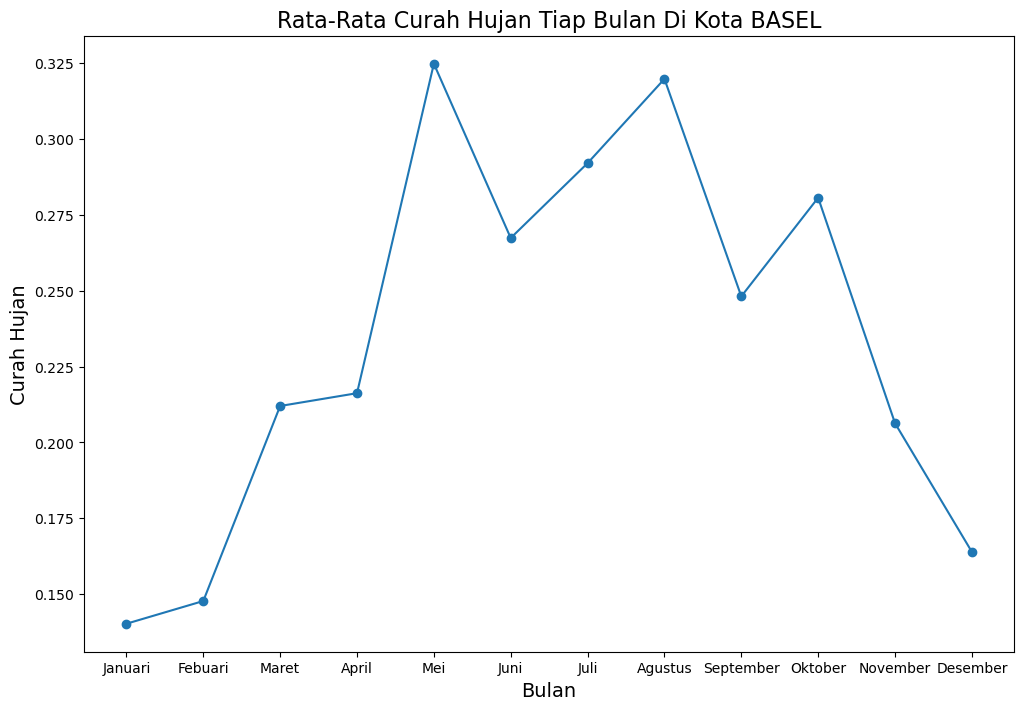

In [119]:
bulan = ['Januari','Febuari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']
bulan_numeric = [1,2,3,4,5,6,7,8,9,10,11,12]
rata_curah_hujan = df.groupby('MONTH',as_index=False).mean()
rata_curah_hujan.replace(bulan_numeric,bulan,inplace=True)
fig = plt.subplots(figsize=(12,8))
plt.plot(rata_curah_hujan['MONTH'],rata_curah_hujan['BASEL_precipitation'],marker='o')
plt.title("Rata-Rata Curah Hujan Tiap Bulan Di Kota BASEL",fontsize=16)
plt.xlabel("Bulan",fontsize=14)
plt.ylabel("Curah Hujan",fontsize=14)
plt.show()

<p><b>2.Memvisualisasi Banyak Jumlah Awaan (Cloud Cover),Kelembapan (Humidity),Dan Temperatur Minimum Dalam Dataset</b></p>

array([[<Axes: title={'center': 'BASEL_pressure'}>]], dtype=object)

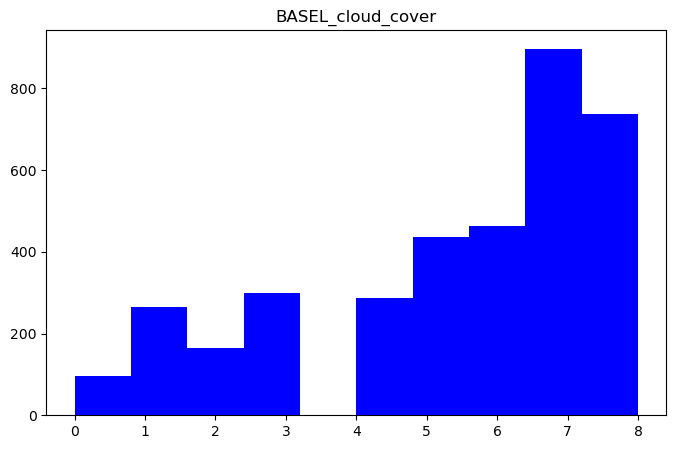

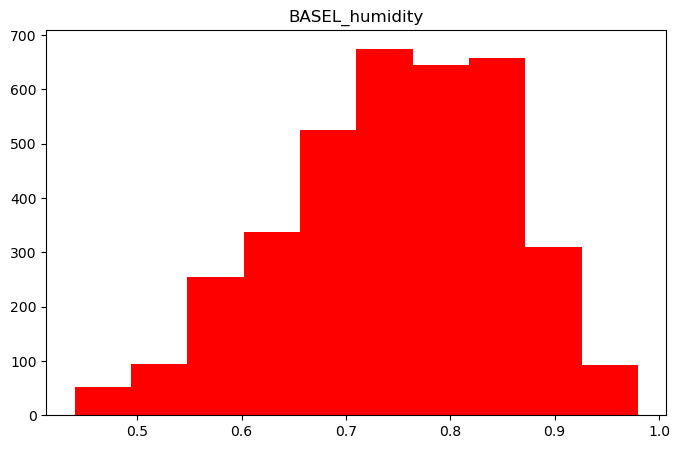

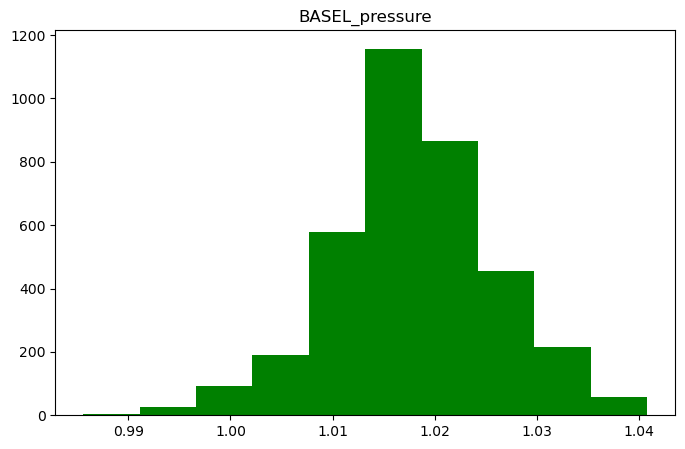

In [120]:
#Visualisasi Data Kolom Jumlah Awan (Clout Cover) Dengan Histogram
df.hist(column='BASEL_cloud_cover',figsize=(8,5),grid=False,zorder=2,color='blue')
#Visualisasi Data Kolom Angka Kelembapan (Humidity) Dengan Histogram
df.hist(column='BASEL_humidity',figsize=(8,5),grid=False,zorder=2,color='red')
#Visualisasi Data Kolom Tekanan Angin (Pressure) Dengan Histogram
df.hist(column='BASEL_pressure',figsize=(8,5),grid=False,zorder=2,color='green')

<p><b>3.Memvisualisasikan Data Kelembapan Dengan Curah Hujan Menggunakan Scatter Plot</b></p>

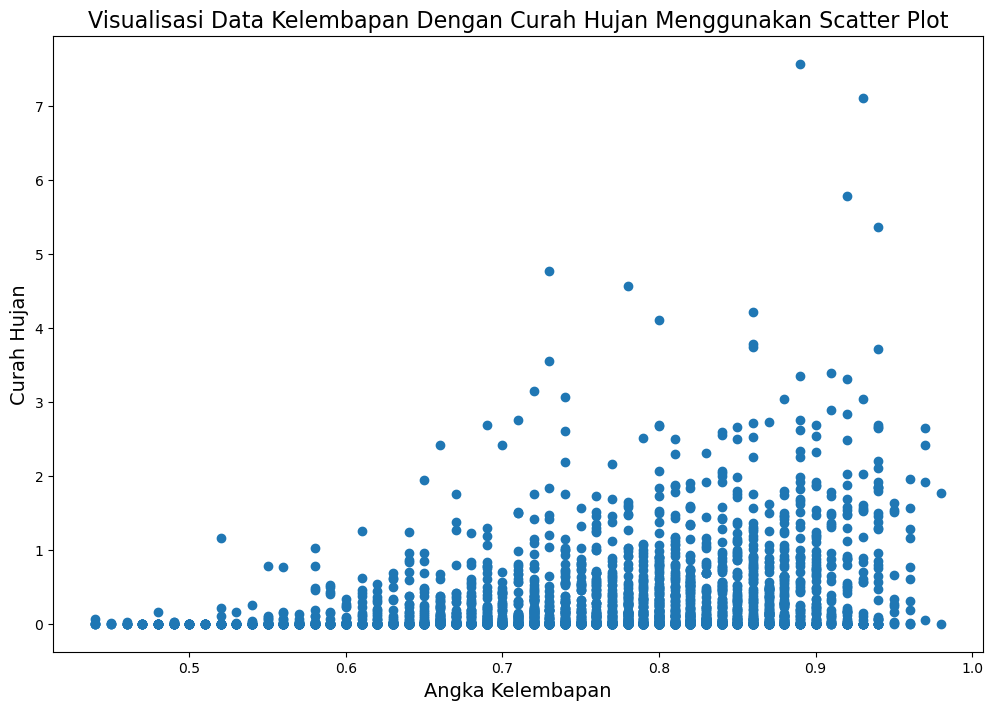

In [121]:
fig = plt.subplots(figsize=(12,8))
plt.scatter(df['BASEL_humidity'],df['BASEL_precipitation'])
plt.title("Visualisasi Data Kelembapan Dengan Curah Hujan Menggunakan Scatter Plot",fontsize=16)
plt.xlabel("Angka Kelembapan",fontsize=14)
plt.ylabel("Curah Hujan",fontsize=14)
plt.show()

<p><b>4.Memvisualisasikan Data Jumlah Awan Dengan Curah Hujan</b></p>

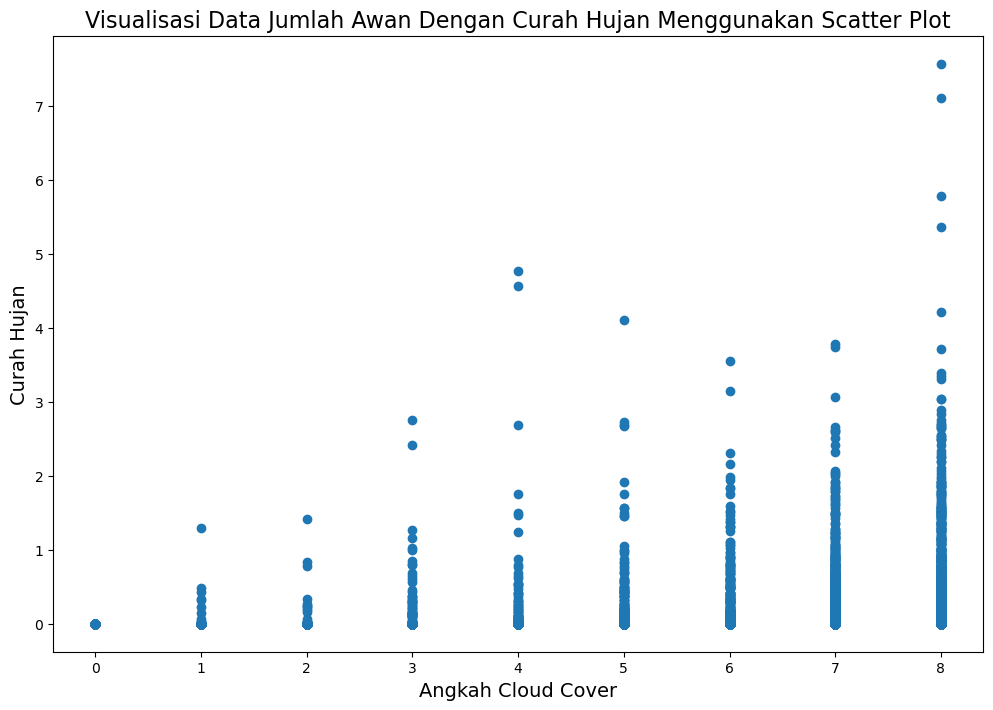

In [122]:
fig = plt.subplots(figsize=(12,8))
plt.scatter(df['BASEL_cloud_cover'],df['BASEL_precipitation'])
plt.title("Visualisasi Data Jumlah Awan Dengan Curah Hujan Menggunakan Scatter Plot",fontsize=16)
plt.xlabel("Angkah Cloud Cover",fontsize=14)
plt.ylabel("Curah Hujan",fontsize=14)
plt.show()

<p><b>5.Memvisualisasikan Data Kolom Pressure Dan Sunshine Dengan Curah Hujan</b></p>

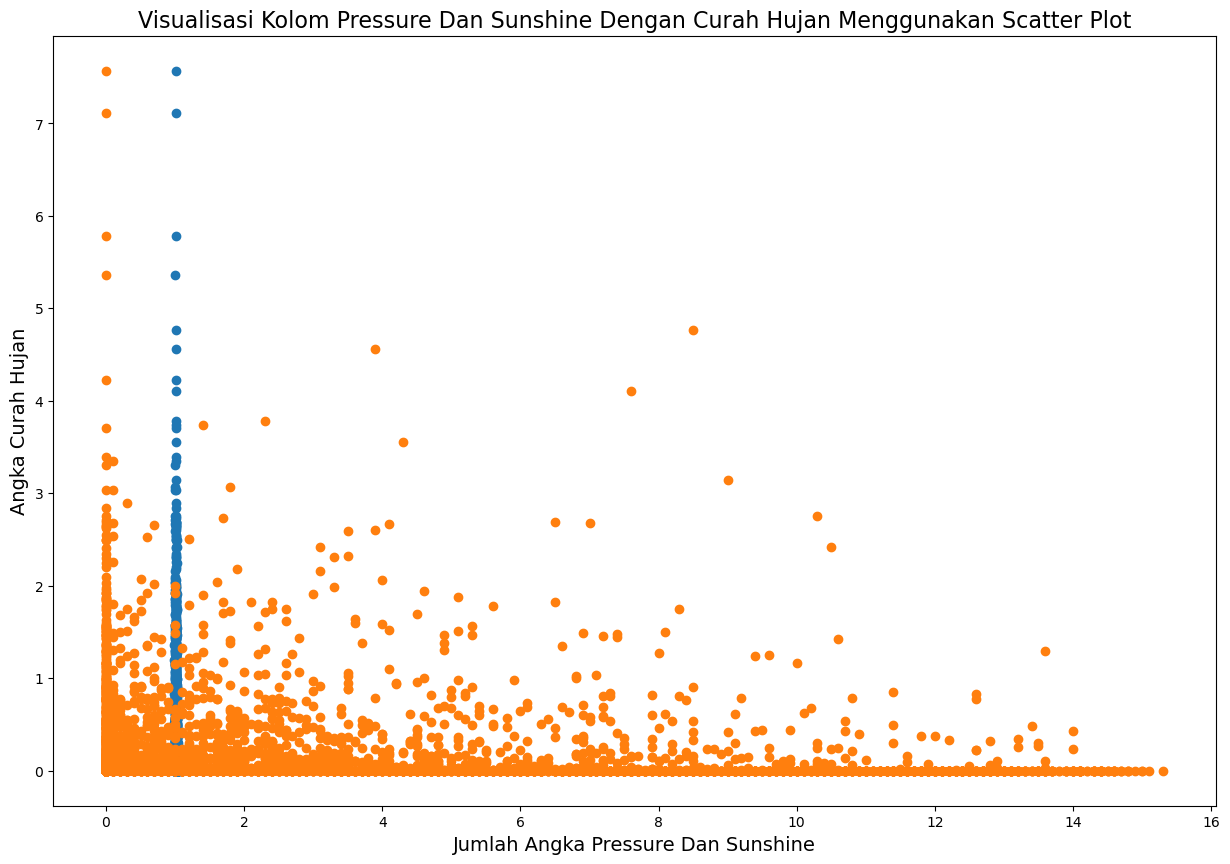

In [123]:
fig = plt.subplots(figsize=(15,10))
plt.scatter(df['BASEL_pressure'],df['BASEL_precipitation'])
plt.scatter(df['BASEL_sunshine'],df['BASEL_precipitation'])
plt.title("Visualisasi Kolom Pressure Dan Sunshine Dengan Curah Hujan Menggunakan Scatter Plot",fontsize=16)
plt.xlabel("Jumlah Angka Pressure Dan Sunshine",fontsize=14)
plt.ylabel("Angka Curah Hujan",fontsize=14)
plt.show()

<h2><b>KORELASI VARIABEL</b></h2>

<p><b>1.Melihat Korelasi Seluruh Variabel</b></p>

In [124]:
df.corr()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
DATE,1.000000,0.009813,-0.001340,-0.013245,-0.014448,0.018874,-0.004371,-0.006841,-0.009015,-0.006173,-0.011170
MONTH,0.009813,1.000000,0.015448,0.260994,-0.016730,-0.095845,0.031591,-0.043449,0.156928,0.207835,0.116118
BASEL_cloud_cover,-0.001340,0.015448,1.000000,0.485556,-0.283421,-0.577061,0.287844,-0.822297,-0.186090,-0.024030,-0.298167
BASEL_humidity,-0.013245,0.260994,0.485556,1.000000,-0.022161,-0.687209,0.308205,-0.652701,-0.374748,-0.202812,-0.459815
BASEL_pressure,-0.014448,-0.016730,-0.283421,-0.022161,1.000000,-0.011149,-0.303647,0.160156,-0.223560,-0.267213,-0.186899
BASEL_global_radiation,0.018874,-0.095845,-0.577061,-0.687209,-0.011149,1.000000,-0.187567,0.850266,0.709448,0.555853,0.783612
BASEL_precipitation,-0.004371,0.031591,0.287844,0.308205,-0.303647,-0.187567,1.000000,-0.272120,0.068006,0.143707,0.022853
BASEL_sunshine,-0.006841,-0.043449,-0.822297,-0.652701,0.160156,0.850266,-0.272120,1.000000,0.459867,0.272287,0.572031
BASEL_temp_mean,-0.009015,0.156928,-0.186090,-0.374748,-0.223560,0.709448,0.068006,0.459867,1.000000,0.964031,0.980938
BASEL_temp_min,-0.006173,0.207835,-0.024030,-0.202812,-0.267213,0.555853,0.143707,0.272287,0.964031,1.000000,0.905618


<p><b>2.Memvisualisasikan Korelasi Dataset Dengan Heatmap (Seaborn)</b></p>

Text(0.5, 1.0, 'Mevisualisaikan Korelasi Antar Variable Dengan Heatmap')

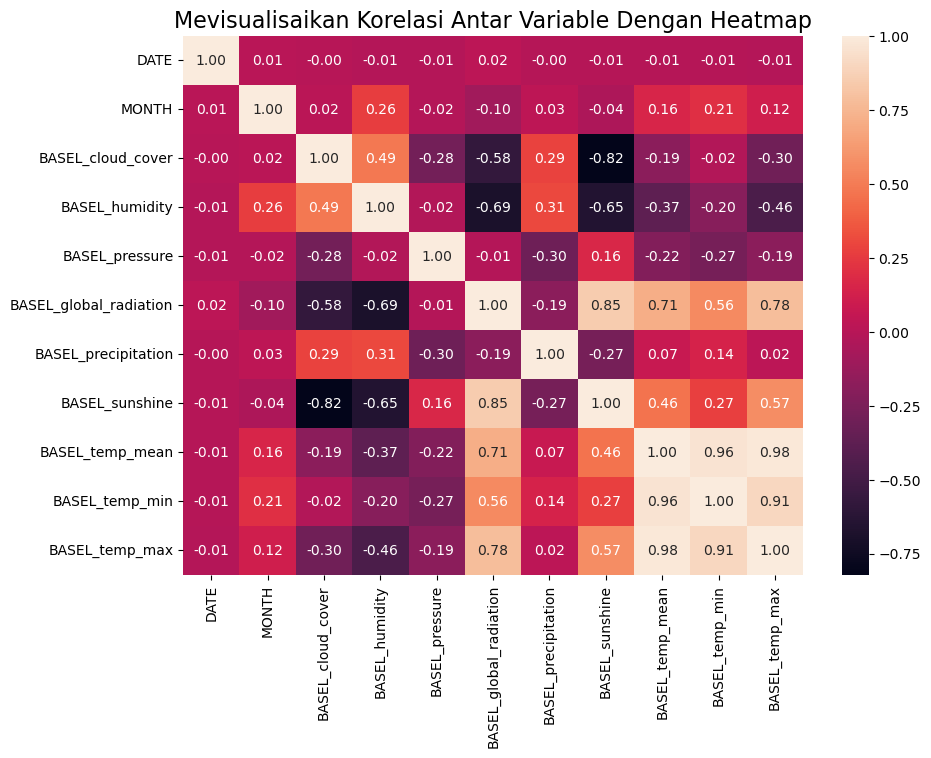

In [125]:
plt.figure(figsize=(10,7))
corelasi = df.corr()
sns.heatmap(corelasi,annot=True,fmt='.2f')
plt.title("Mevisualisaikan Korelasi Antar Variable Dengan Heatmap",fontsize=16)

<p><b>3.Membuat Fungsi Untuk Mencari Angka Korelasi 1 Variabel Dengan Variabel Lainnya</b></p>

In [126]:
def koef(dataset=df,kolomDependen='BASEL_precipitation',arrKolomIndependent=['BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       'BASEL_temp_max']):
    for data in arrKolomIndependent:
        pearson_corr,p_value = stats.pearsonr(dataset[kolomDependen],dataset[data])
        
        if data == kolomDependen:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Memiliki Korelasi Pearson Sempurna Di Karenakan Kedua Kolom Sama!")
            print("")
        elif pearson_corr > 0.7:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr > 0.5:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr > 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr == 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Tidak Memilik Korelasi Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < -0.7:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Kuat Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < -0.5:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Sedang Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")

<p><b>4.Mengecek Korelasi Curah Hujan Dengan Variabel Lainya</b></p>

In [127]:
koef(kolomDependen='BASEL_precipitation')

Dataset Kolom 'BASEL_precipitation' Dan 'BASEL_cloud_cover' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.2878442122742553

Dataset Kolom 'BASEL_precipitation' Dan 'BASEL_humidity' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.30820450907765407

Dataset Kolom 'BASEL_precipitation' Dan 'BASEL_pressure' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : -0.3036469059795573

Dataset Kolom 'BASEL_precipitation' Dan 'BASEL_global_radiation' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : -0.18756666257432664

Dataset Kolom 'BASEL_precipitation' Dan 'BASEL_sunshine' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : -0.2721203157710212

Dataset Kolom 'BASEL_precipitation' Dan 'BASEL_temp_mean' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.06800563362472875

Dataset Kolom 'BASEL_precipitation' Dan 'BASEL_temp_min' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.143706630730179

Dataset Kolom 'BASEL_precipitation' Da

<h2><b>REGRESI</b></h2>

<p><b>Linear Regresi Dengan 1 Variabel Bebas  </b></p>
<p>1.Mempersiapkan data (mendeklarasikan variabel bebas dan variabel terikat)</p>

In [128]:
X = df[['BASEL_humidity']]
y = df['BASEL_precipitation']

<p><b>2.Membagi Dataset Jadi 2 Yaitu Dataset Train Dan Test</b></p>

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=100)

<p><b>3.Melihat Jumlah Dataset Setelah Di Bagi</b></p>

In [130]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (2731, 1)
Jumlah Data X Test :  (911, 1)
Jumlah Data y Train :  (2731,)
Jumlah Data y Test :  (911,)


<p><b>4.Membuat Model Prediksi Linear Regresi</b></p>

In [131]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Melihat Nilai Koefisien Dan Intercept</b></p>

In [132]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [1.47955464]
Nilai Intercept :  -0.8701401686014593


<p><b>6.Memvisualisaikan Scatter Plot Dengan Garis Regresi </b></p>

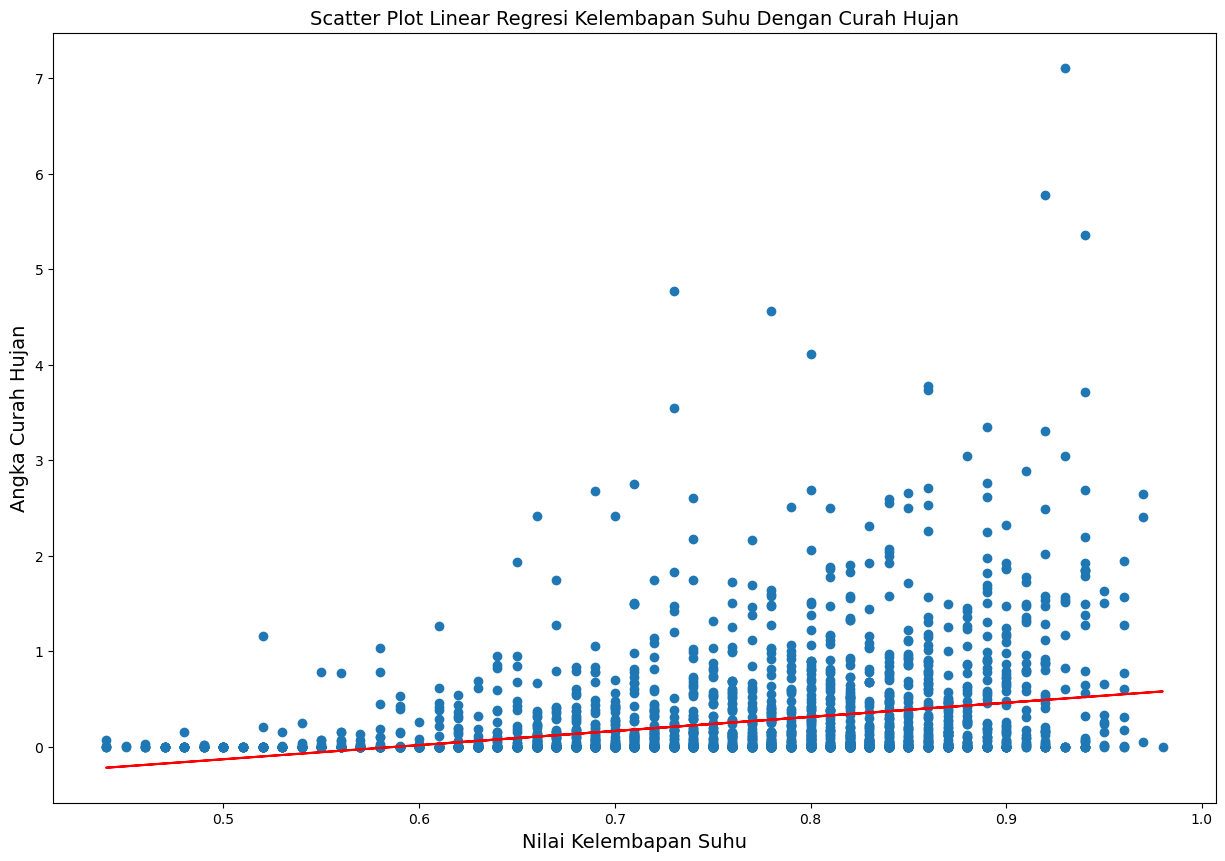

In [133]:
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train,y_train)
ax.plot(X_train, linreg_model.coef_*X_train + linreg_model.intercept_, '-r')
plt.title("Scatter Plot Linear Regresi Kelembapan Suhu Dengan Curah Hujan",fontsize="14")
plt.xlabel("Nilai Kelembapan Suhu",fontsize="14")
plt.ylabel("Angka Curah Hujan",fontsize="14")
plt.show()

<p><b>7.Evaluasi Model Prediksi</b></p>

In [134]:
y_pred = linreg_model.predict(X_test)
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  0.5313408907390927
Mean Absolute Error (MAE):  0.30650987957932874
Mean Squared Error (MSE):  0.28232314217141247


<p><b>Linear Regresi Dengan 3 Variabel Bebas  </b></p>
<p>1.Mempersiapkan data (mendeklarasikan variabel bebas dan variabel terikat)</p>

In [135]:
variabelBebas = ['BASEL_humidity','BASEL_cloud_cover','BASEL_temp_min']
X = df[variabelBebas]
y = df['BASEL_precipitation']

<p>2.Membagi data menjadi dua yaitu data Train dan data Test</p>

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=100);

<p><b>3.Melihat Jumlah Dataset Setelah Di Bagi</b></p>

In [137]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (2549, 3)
Jumlah Data X Test :  (1093, 3)
Jumlah Data y Train :  (2549,)
Jumlah Data y Test :  (1093,)


<p><b>4.Membuat Model Prediksi Linear Regresi</b></p>

In [138]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Melihat Nilai Koefisien Dan Intercept</b></p>

In [139]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [1.22102728 0.03669624 0.01647679]
Nilai Intercept :  -0.9927892264782753


<p><b>6.Memvisualisaikan Scatter Plot Dengan Garis Regresi </b></p>

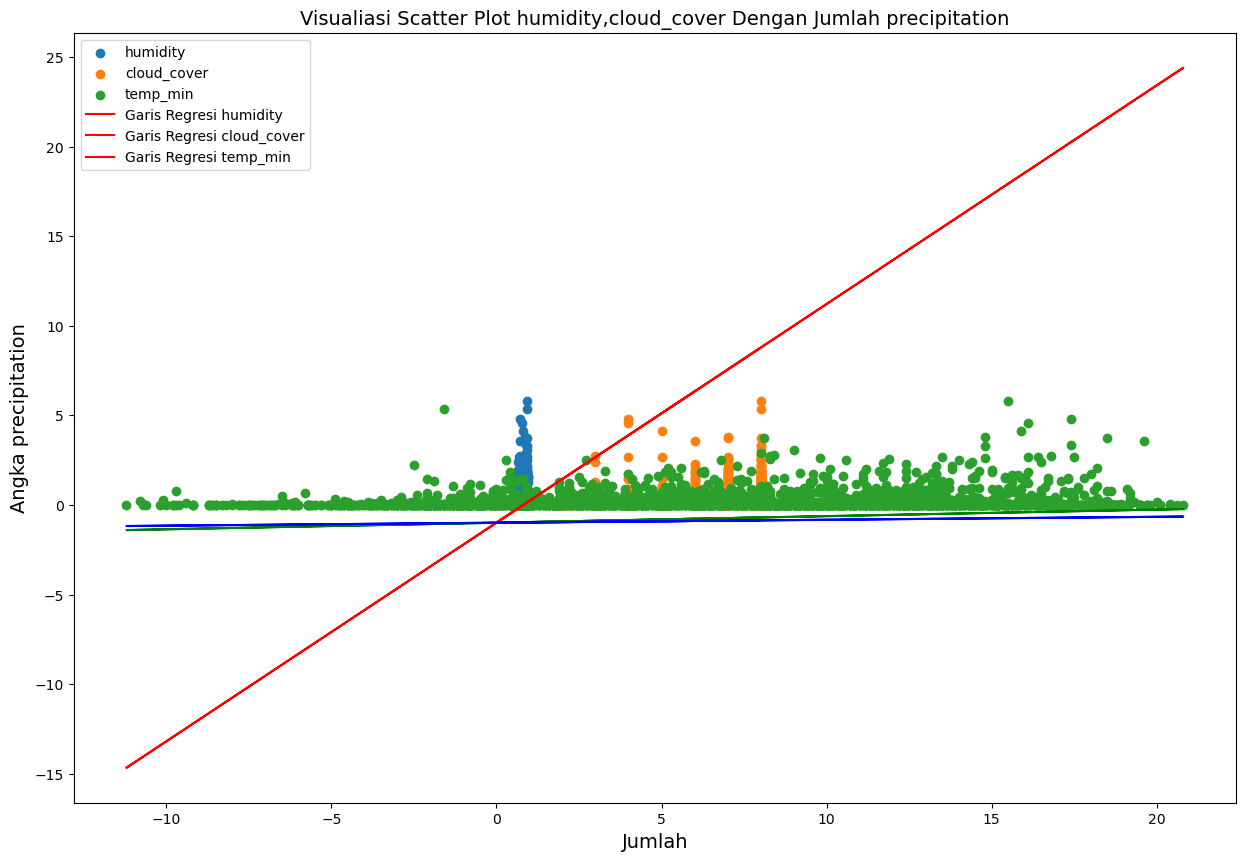

In [140]:
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train[variabelBebas[0]],y_train)
plt.scatter(X_train[variabelBebas[1]],y_train)
plt.scatter(X_train[variabelBebas[2]],y_train)
ax.plot(X_train, linreg_model.coef_[0]*X_train + linreg_model.intercept_, '-r')
ax.plot(X_train, linreg_model.coef_[1]*X_train + linreg_model.intercept_, '-g')
ax.plot(X_train, linreg_model.coef_[2]*X_train + linreg_model.intercept_, '-b')
plt.title("Visualiasi Scatter Plot humidity,cloud_cover Dengan Jumlah precipitation",fontsize="14")
plt.ylabel("Angka precipitation",fontsize="14")
plt.xlabel("Jumlah",fontsize="14")
plt.legend(['humidity','cloud_cover','temp_min','Garis Regresi humidity','Garis Regresi cloud_cover','Garis Regresi temp_min'])
plt.show()

<p><b>7.Evaluasi Model Prediksi</b></p>

In [141]:
y_pred = linreg_model.predict(X_test)
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  0.543131125452898
Mean Absolute Error (MAE):  0.30669151651141163
Mean Squared Error (MSE):  0.29499141943573165


<p><b>Linear Regresi Dengan 5 Variabel Bebas  </b></p>
<p>1.Mempersiapkan data (mendeklarasikan variabel bebas dan variabel terikat)</p>

In [142]:
variabelBebas = ['BASEL_humidity','BASEL_pressure','BASEL_cloud_cover','BASEL_temp_mean','BASEL_temp_min']
X = df[variabelBebas]
y = df['BASEL_precipitation']

<p>2.Membagi data menjadi dua yaitu data Train dan data Test</p>

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=100);

<p><b>3.Melihat Jumlah Dataset Setelah Di Bagi</b></p>

In [144]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (2549, 5)
Jumlah Data X Test :  (1093, 5)
Jumlah Data y Train :  (2549,)
Jumlah Data y Test :  (1093,)


<p><b>4.Membuat Model Prediksi Linear Regresi</b></p>

In [145]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Melihat Nilai Koefisien Dan Intercept</b></p>

In [146]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [ 1.27590541  0.04440226 -0.05691703  0.03355621  0.03732548]
Nilai Intercept :  -1.1478919512607755


<p><b>6.Memvisualisaikan Scatter Plot Dengan Garis Regresi </b></p>

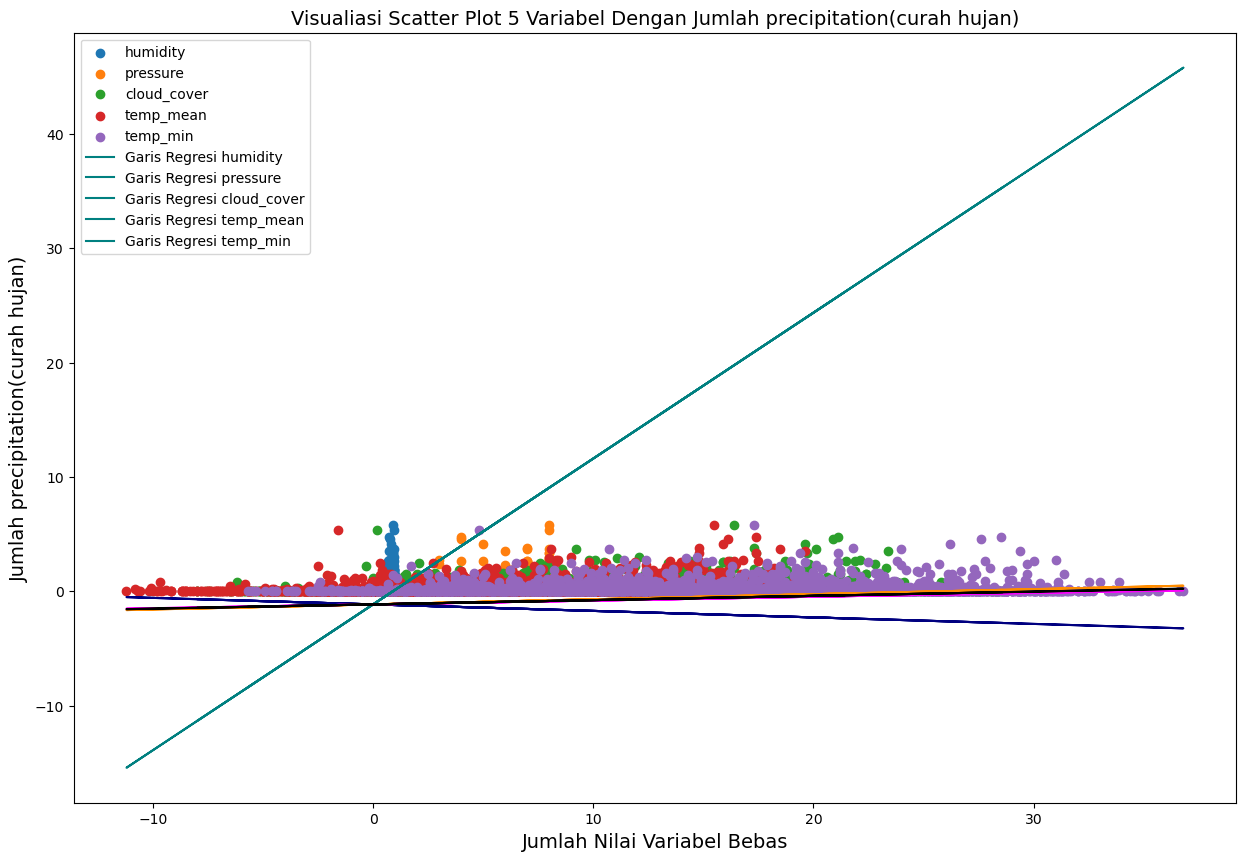

In [153]:


['humidity''pressure','cloud_cover','temp_mean','temp_min']
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train[variabelBebas[0]],y_train)
plt.scatter(X_train[variabelBebas[1]],y_train)
plt.scatter(X_train[variabelBebas[2]],y_train)
plt.scatter(X_train[variabelBebas[3]],y_train)
plt.scatter(X_train[variabelBebas[4]],y_train)
ax.plot(X_train, linreg_model.coef_[0]*X_train + linreg_model.intercept_, 'teal')
ax.plot(X_train, linreg_model.coef_[1]*X_train + linreg_model.intercept_, 'darkorange')
ax.plot(X_train, linreg_model.coef_[2]*X_train + linreg_model.intercept_, 'navy')
ax.plot(X_train, linreg_model.coef_[3]*X_train + linreg_model.intercept_, 'fuchsia')
ax.plot(X_train, linreg_model.coef_[4]*X_train + linreg_model.intercept_, 'black')
plt.title("Visualiasi Scatter Plot 5 Variabel Dengan Jumlah precipitation(curah hujan)",fontsize="14")
plt.xlabel("Jumlah Nilai Variabel Bebas",fontsize="14")
plt.ylabel("Jumlah precipitation(curah hujan)",fontsize="14")
plt.legend(['humidity','pressure','cloud_cover','temp_mean','temp_min','Garis Regresi humidity','Garis Regresi pressure','Garis Regresi cloud_cover','Garis Regresi temp_mean','Garis Regresi temp_min'])
plt.show()



<p><b>7.Evaluasi Model Prediksi</b></p>

In [155]:
y_pred = linreg_model.predict(X_test)
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  0.5440996140835339
Mean Absolute Error (MAE):  0.30548544037571174
Mean Squared Error (MSE):  0.2960443900458506
